In [1]:
%matplotlib widget
import os
import numpy as np 
import pandas as pd
from sklearn import metrics
import matplotlib.pyplot as plt

In [2]:
def delta_avg(data_in):
    x_out = 1/len(data_in) * np.sqrt(np.sum(data_in**2))
    return x_out


def delta_weight_avg(data, delta_data, weighting):
    terms = []
    tw = np.sum(weighting)
    for i in range(len(data)):
        xte = (1/tw * delta_data[i] * weighting[i])**2
        terms.append(xte)
        del xte
    terms = np.array(terms)
    return np.sqrt(np.sum(terms))


def save_fig(figure, save_fig_name, dpi_in=400, path="./Output/Plots/"):
    """
    Function to save plots.
    """
    abs_path = path + save_fig_name

    if os.path.exists(abs_path):
        print("!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!")
        print("!!!                                                     !!!")
        print("!!!   You forgot to change the file name! Not Saving!   !!!")
        print("!!!                                                     !!!")
        print("!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!")
        return 1
    else:
        figure.savefig(abs_path, bbox_inches='tight', dpi=dpi_in)
        print("Saved sucessfully!")
        return 0

fs = 15

In [3]:
lif_ours = pd.read_excel(f'./Output/Neutron_Flux/LiF_Our.ods', usecols='A:E',header=1).dropna()
lif_klein = pd.read_excel(f'./Output/Neutron_Flux/LiF_Kleinschmidt.ods', usecols='A:E',header=1).dropna()
lif_jung = pd.read_excel(f'./Output/Neutron_Flux/LiF_Jung.ods', usecols='A:E',header=1).dropna()
lif_shots_per_set = np.array([10, 10, 15, 15])


cu_ours = pd.read_excel(f'./Output/Neutron_Flux/Cu_Our.ods', usecols='A:E',header=1).dropna()
cu_klein = pd.read_excel(f'./Output/Neutron_Flux/Cu_Kleinschmidt.ods', usecols='A:E',header=1).dropna()
cu_jung = pd.read_excel(f'./Output/Neutron_Flux/Cu_Jung.ods', usecols='A:E',header=1).dropna()
cu_shots_per_set = np.array([10, 10, 10, 10, 10, 10, 10, 15, 15])



lif_dat = [lif_ours['Neutrons'].to_numpy(), lif_klein['Neutrons'].to_numpy(), 
            lif_jung['Neutrons'].to_numpy()]
lif_dn_dat = [lif_ours['Uncertainty'].to_numpy(), lif_klein['Uncertainty'].to_numpy(), lif_jung['Uncertainty'].to_numpy()]
lif_avg_n = []
lif_dn = []


cu_dat = [cu_ours['Neutrons'].to_numpy(), cu_klein['Neutrons'].to_numpy(), 
            cu_jung['Neutrons'].to_numpy()]
cu_dn_dat = [cu_ours['Uncertainty'].to_numpy(), cu_klein['Uncertainty'].to_numpy(), cu_jung['Uncertainty'].to_numpy()]
cu_avg_n = []
cu_dn = []

scca = 1e-7
for i in range(len(lif_dat)):
    lif_dat[i] = (0.5 * (np.int32(lif_dat[i][::2]) + np.int32(lif_dat[i][1::2])))
    lif_dn_dat[i] = (0.5 * (lif_dn_dat[i][::2] + lif_dn_dat[i][1::2]))

    cu_dat[i] = (0.5 * (np.int32(cu_dat[i][::2]) + np.int32(cu_dat[i][1::2])))
    cu_dn_dat[i] = (0.5 * (cu_dn_dat[i][::2] + cu_dn_dat[i][1::2]))

In [4]:
for i in range(len(lif_dat)):
    lif_avg_n.append(1/np.sum(lif_shots_per_set) * np.sum(lif_shots_per_set * lif_dat[i]))
    lif_dn.append(delta_weight_avg(lif_dat[i], lif_dn_dat[i], lif_shots_per_set))

    cu_avg_n.append(1/np.sum(cu_shots_per_set) * np.sum(cu_shots_per_set * cu_dat[i]))
    cu_dn.append(delta_weight_avg(cu_dat[i], cu_dn_dat[i], cu_shots_per_set))


lif_avg_n = np.array(lif_avg_n) * scca
lif_dn = np.array(lif_dn) * scca

cu_avg_n = np.array(cu_avg_n) * scca
cu_dn = np.array(cu_dn) * scca

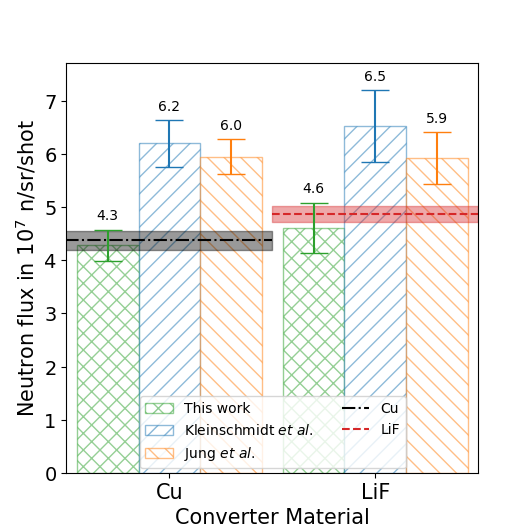

In [5]:
figco = plt.figure(figsize=(1.0 * 13.5 / 2.54, 1.0 * 13.5 / 2.54))
axco = figco.add_subplot(111)
axco.tick_params(labelsize=14)
width = 0.3


x = np.arange(2)
axco.set_xticks(x)
xlabels = ["Cu", "LiF"]
axco.set_xticklabels(xlabels, rotation=0, fontsize=fs)

# Cu
cu_mcdelta = 8.71e5 * 2 * scca
cu_mcvalue = 4.38e7 * scca

bdcu_ours = axco.bar(x[0] - width, cu_avg_n[0], yerr=cu_dn[0], hatch="xx", width=width, align='center', alpha=0.5,
                        color='white', ecolor='tab:green', edgecolor="tab:green", capsize=10, label="This work")
bdcu_klein = axco.bar(x[0], cu_avg_n[1], yerr=cu_dn[1], hatch="//", width=width, alpha=0.5, align='center', color='white', 
                        ecolor='tab:blue', edgecolor="tab:blue", capsize=10,label="Kleinschmidt $\it{et}$ $\it{al.}$")
bdcu_jung = axco.bar(x[0] + width, cu_avg_n[2], yerr=cu_dn[2], hatch="\\\\", width=width, alpha=0.5, align='center', 
                        ecolor='tab:orange', color='white', edgecolor='tab:orange', capsize=10,label="Jung $\it{et}$ $\it{al.}$")

mccu = axco.hlines(cu_mcvalue, -1, 0.5, color="black", linestyle="-.", label="Cu")
xcu = np.linspace(-1, 0.5, 10)
plt.fill_between(xcu, (cu_mcvalue - cu_mcdelta), (cu_mcvalue + cu_mcdelta), alpha=0.4, color="black")



# LiF
lif_mcdelta = 7.85e5 * 2 * scca
lif_mcvalue = 4.88e7 * scca

bdlif_ours = axco.bar(x[1] - width, lif_avg_n[0], yerr=lif_dn[0], hatch="xx", width=width, alpha=0.5, align='center', 
                        color='white', edgecolor="tab:green", ecolor='tab:green', capsize=10)
bdlif_klein = axco.bar(x[1], lif_avg_n[1], yerr=lif_dn[1], hatch="//", width=width, alpha=0.5, align='center', color='white', 
                        ecolor='tab:blue', edgecolor="tab:blue", capsize=10)
bdlif_jung = axco.bar(x[1] + width, lif_avg_n[2], yerr=lif_dn[2], hatch="\\\\", width=width, alpha=0.5, align='center', 
                        color='white', edgecolor="tab:orange", ecolor='tab:orange', capsize=10)

mclif = axco.hlines(lif_mcvalue, 0.5, 1.5, color="tab:red", linestyle="--", label="LiF")
xli = np.linspace(0.5, 1.5, 10)
plt.fill_between(xli, (lif_mcvalue - lif_mcdelta), (lif_mcvalue + lif_mcdelta), alpha=0.4, color="tab:red")



def autolabel(rects, dat, dn_dat):
    """Attach a text label above each bar in *pht*, displaying its height."""
    height = round(rects[0].get_height(), 2)

    axco.annotate('{:.1f}'.format(height/1e0), color="black",
                    xy=(rects[0].get_x() + rects[0].get_width() / 2, height + dn_dat),
                    xytext=(0, 5),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(bdcu_ours, cu_avg_n[0], cu_dn[0])
autolabel(bdcu_klein, cu_avg_n[1], cu_dn[1])
autolabel(bdcu_jung, cu_avg_n[2], cu_dn[2])


autolabel(bdlif_ours, lif_avg_n[0], lif_dn[0])
autolabel(bdlif_klein, lif_avg_n[1], lif_dn[1])
autolabel(bdlif_jung, lif_avg_n[2], lif_dn[2])


plt.xlim(-0.5, 1.5)
max_valp = lif_avg_n[1] + lif_dn[1]
plt.ylim(0, 1.07 * max_valp)
axco.set_ylabel("Neutron flux in $10^7$ n/sr/shot", fontsize=fs)
axco.set_xlabel("Converter Material", fontsize=fs)

handles, labels = plt.gca().get_legend_handles_labels()
order = [2, 3, 4, 0, 1]
plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order], loc=(0.178, 0.01), ncols=2)
plt.show()
# save_fig(figco, "Paper_Comparison_Full3.pdf")

In [6]:
from scipy.signal import savgol_filter


def norm(data_in):
    return metrics.auc(data_in[0], data_in[2])

poly_order = 10
savgol_window = 30




path = "./Data/Monte_Carlo"
be = np.loadtxt(open(f"{path}/Be/0deg_lin.cross").readlines()[:-19], skiprows=151, usecols=(0,1,2,3), unpack=True)
be[2] = savgol_filter(be[2], savgol_window, poly_order)
be[3] = savgol_filter(be[3], savgol_window, poly_order)

cu = np.loadtxt(open(f"{path}/Cu/0deg_lin.cross").readlines()[:-19], skiprows=151, usecols=(0,1,2,3), unpack=True)
cu[2] = savgol_filter(cu[2], savgol_window, poly_order)
cu[3] = savgol_filter(cu[3], savgol_window, poly_order)

lif = np.loadtxt(open(f"{path}/LiF/0deg_lin.cross").readlines()[:-19], skiprows=151, usecols=(0,1,2,3), unpack=True)
lif[2] = savgol_filter(lif[2], savgol_window, poly_order)
lif[3] = savgol_filter(lif[3], savgol_window, poly_order)

ta = np.loadtxt(open(f"{path}/Ta/0deg_lin.cross").readlines()[:-19], skiprows=151, usecols=(0,1,2,3), unpack=True)
ta[2] = savgol_filter(ta[2], savgol_window, poly_order)
ta[3] = savgol_filter(ta[3], savgol_window, poly_order)


be_norm = norm(be)
cu_norm = norm(cu)
lif_norm = norm(lif)
ta_norm = norm(ta)

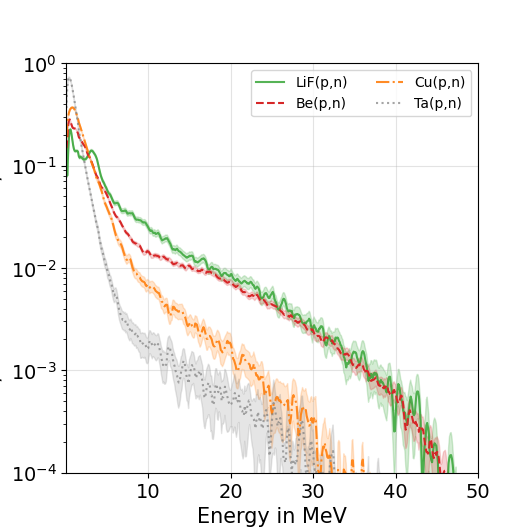

In [7]:
figp = plt.figure(figsize=(1.5 * 13.5 / 2.54, 1.0 * 13.5 / 2.54))
plt.tick_params(labelsize=14)


plt.plot(lif[0], lif[2]/lif_norm, color="tab:green", linestyle="-", label="LiF(p,n)", alpha=0.8)
plt.fill_between(lif[0], lif[2]/lif_norm * (1 - lif[3]), lif[2]/lif_norm* (1 + lif[3]), alpha=0.2, color="tab:green")

plt.plot(be[0], be[2]/be_norm, color="tab:red", linestyle="--", label="Be(p,n)")
plt.fill_between(be[0], be[2]/be_norm * (1 - be[3]), be[2]/be_norm* (1 + be[3]), alpha=0.2, color="tab:red")

plt.plot(cu[0], cu[2]/cu_norm, color="tab:orange", linestyle="-.", label="Cu(p,n)", alpha=0.9)
plt.fill_between(cu[0], cu[2]/cu_norm * (1 - cu[3]), cu[2]/cu_norm* (1 + cu[3]), alpha=0.2, color="tab:orange")

plt.plot(ta[0], ta[2]/ta_norm, color="tab:gray", linestyle=":", label="Ta(p,n)", alpha=0.7)
plt.fill_between(ta[0], ta[2]/ta_norm * (1 - ta[3]), ta[2]/ta_norm* (1 + ta[3]), alpha=0.2, color="tab:gray")


plt.yscale('log')
plt.xscale('linear')
plt.xlabel("Energy in MeV", fontsize=fs)
plt.ylabel("dN/dE normalized in 1/MeV", fontsize=fs)
plt.xlim(0.1,50)
plt.ylim(1e-4, 1)
plt.legend(loc="best", ncols=2)
plt.grid(alpha=0.35)
plt.show()
# save_fig(figp, "BD-Spectra-MC.pdf")